<a href="https://colab.research.google.com/github/swilsonmfc/DeepLearning/blob/master/MovieReviewClassification_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
* Data prepackaged with Keras
* IMDB Reviews
* Binary Classification
* Cross-Entropy Loss
* Two hidden dense layers with relu activation
* Final layer sigmoid activation
* Use train / validation plots to decide number of epochs
* Report test metrics on final model

In [1]:
import keras
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import regularizers
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
[train_data, train_label], [test_data, test_label] = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


# Examine Data

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
decoded

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Train & Test Sets

In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test  = vectorize_sequences(test_data)

y_train = np.array(train_label).astype('float32')
y_test  = np.array(test_label).astype('float32')

# Training & Validation Sets

In [0]:
X_val = X_train[:10000]
X_train_part = X_train[10000:]

y_val = y_train[:10000]
y_train_part = y_train[10000:]

# Define Model

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile & Fit Model

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train_part,
                   y_train_part,
                   epochs=20,
                   batch_size=512,
                   validation_data=[X_val, y_val])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.5027 - binary_accuracy: 0.7927 - val_loss: 0.3927 - val_binary_accuracy: 0.8594
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2954 - binary_accuracy: 0.9093 - val_loss: 0.2998 - val_binary_accuracy: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2172 - binary_accuracy: 0.9305 - val_loss: 0.2766 - val_binary_accuracy: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1686 - binary_accuracy: 0.9461 - val_loss: 0.2790 - val_binary_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1358 - binary_accuracy: 0.9559 - val_loss: 0.2859 - val_binary_accuracy: 0.8877
Epoch 6/20
15000/15000 [===================

# Plot Training & Validation Loss

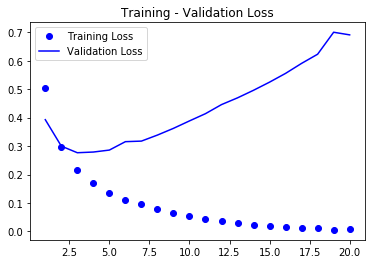

In [10]:
def plotTrainingValidationLoss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  epochs = range(1, len(loss_values) + 1)
  val_loss_values = history_dict['val_loss']

  plt.clf()
  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b-', label='Validation Loss')
  plt.title('Training - Validation Loss')
  plt.xlabel=('Epochs')
  plt.ylabel=('Loss')
  plt.legend()
  plt.show()

plotTrainingValidationLoss(history)

# Plot Training & Validation Accuracy

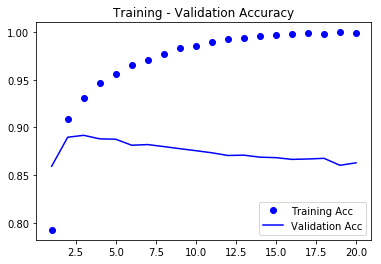

In [11]:
def plotTrainingValidationAccuracy(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  epochs = range(1, len(loss_values) + 1)
  val_loss_values = history_dict['val_loss']

  plt.clf()
  acc = history_dict['binary_accuracy']
  val_acc = history_dict['val_binary_accuracy']
  plt.plot(epochs, acc, 'bo', label='Training Acc')
  plt.plot(epochs, val_acc, 'b-', label='Validation Acc')
  plt.title('Training - Validation Accuracy')
  plt.xlabel=('Epochs')
  plt.ylabel=('Accuracy')
  plt.legend()
  plt.show()
  
plotTrainingValidationAccuracy(history)

# Identify Overfitting & Test Set
Looks like around 4 epochs we begin to see error rate on validation begin to increase.  Let's refit the model to 4 epochs, use all the training data and look at error on our test set.

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train,
                   y_train,
                   epochs=4,
                   batch_size=512)

results = model.evaluate(X_test, y_test)
print('Loss {} Accuracy {}'.format(results[0], results[1]))

Epoch 1/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.4728 - binary_accuracy: 0.8214
Epoch 2/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.2762 - binary_accuracy: 0.9086
Epoch 3/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.2122 - binary_accuracy: 0.9267
Epoch 4/4
25000/25000 [==============================] - 3s 109us/step
Loss 0.2982972284412384 Accuracy 0.88044


# Regularization
* We have a few options for regularizing (combatting overfitting) in the network:
 * Removing Capacity
 * Weight Regularization
 * Dropout



## Removing Capacity
Removing capacity removes layers or the number of nodes in hidden layers.  Removing layers / nodes has the effect of removing capacity of the network.  For this tpy network let's drop down the number of nodes in each layer from 16 to 4 and examine the effects on loss and accuracy (paying particular attention to the epochs).  In our case, we should begin experiencing increasing validation loss beyond 4 epochs of training.  The plots indicate overfitting at around 16 epochs.

The reverse is true as well.  If we find that we're underfitting we could add capacity to the network either by increasing the width of layers or adding additional layers.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.5773 - binary_accuracy: 0.7634 - val_loss: 0.5017 - val_binary_accuracy: 0.7916
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.4065 - binary_accuracy: 0.8868 - val_loss: 0.3871 - val_binary_accuracy: 0.8672
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.3119 - binary_accuracy: 0.9097 - val_loss: 0.3272 - val_binary_accuracy: 0.8840
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.2509 - binary_accuracy: 0.9268 - val_loss: 0.2981 - val_binary_accuracy: 0.8894
Epoch 5/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2096 - binary_accuracy: 0.9383 - val_loss: 0.2852 - val_binary_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1796 - binary_accuracy: 0.9487 - val_loss: 0.2768 - val_bi

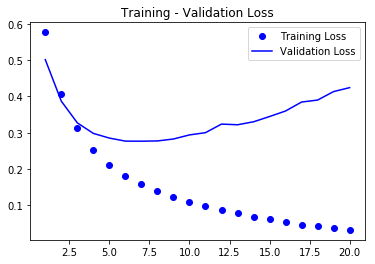

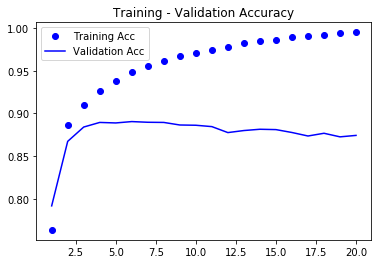

In [13]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train_part,
                   y_train_part,
                   epochs=20,
                   batch_size=512,
                   validation_data=[X_val, y_val])

plotTrainingValidationLoss(history)
plotTrainingValidationAccuracy(history)

## Weight Regularization
Another technique we can apply to regularize (fight overfitting) of our network will be to apply weight regularization.  As the weights of our network get large it's an indication of complexity.  We can apply a penalty to these higher weights.  The penalty usually one of two forms L1 or L2.  With L1 regularization our penalty is proportional to the absolute value of the weights.  This form of regularization is known to promote sparsity (see Lasso in Linear Models).  The second is L2 regularization which applies a penalty proportional to the squared values of the weights.  L2 often referred to as weight decay.

For our toy model, we'll take the original model formulation with layers of 16 nodes and add in L2 regularization.  We'll be looking for the number of epochs to identify the minimum loss in our validation set.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.5930 - binary_accuracy: 0.7282 - val_loss: 0.4654 - val_binary_accuracy: 0.8420
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.3739 - binary_accuracy: 0.8961 - val_loss: 0.3594 - val_binary_accuracy: 0.8860
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2933 - binary_accuracy: 0.9181 - val_loss: 0.3390 - val_binary_accuracy: 0.8848
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.2541 - binary_accuracy: 0.9324 - val_loss: 0.3780 - val_binary_accuracy: 0.8657
Epoch 5/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2306 - binary_accuracy: 0.9428 - val_loss: 0.3666 - val_binary_accuracy: 0.8747
Epoch 6/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.2107 - binary_accuracy: 0.9501 - val_loss: 0.3731 - val_bi

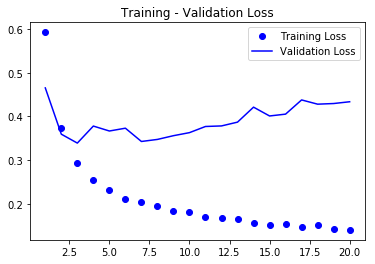

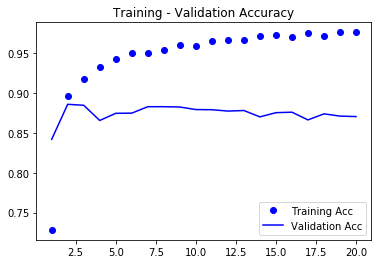

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train_part,
                   y_train_part,
                   epochs=20,
                   batch_size=512,
                   validation_data=[X_val, y_val])

plotTrainingValidationLoss(history)
plotTrainingValidationAccuracy(history)

## Dropout
With dropout, we're going to randomly remove nodes in the network (not actually remove, but rather zero their activation).  This has the effect of removing capacity from the network.  The reduced capacity acts as regularization against overfitting.  In this example I'm dropping out 50% of the network, something smaller like 20% is more typical.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.6531 - binary_accuracy: 0.6171 - val_loss: 0.5763 - val_binary_accuracy: 0.6998
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5601 - binary_accuracy: 0.7420 - val_loss: 0.4843 - val_binary_accuracy: 0.8119
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.4718 - binary_accuracy: 0.8103 - val_loss: 0.4013 - val_binary_accuracy: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.4095 - binary_accuracy: 0.8505 - val_loss: 0.3593 - val_binary_accuracy: 0.8797
Epoch 5/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.3562 - binary_accuracy: 0.8863 - val_loss: 0.3268 - val_binary_accuracy: 0.8797
Epoch 6/20
15000/15000 [=

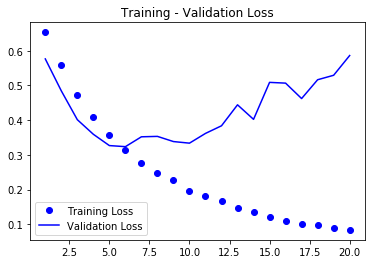

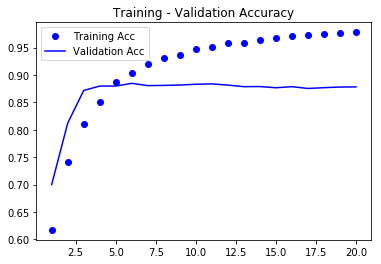

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train_part,
                   y_train_part,
                   epochs=20,
                   batch_size=512,
                   validation_data=[X_val, y_val])

plotTrainingValidationLoss(history)
plotTrainingValidationAccuracy(history)